<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Main Title

## Data Exploration
### Take a quick look at the data sets. There are eight datasets involved in this project:
1. Stock Market Data (NASDAQ, NYSE, S&P 500) folder - Each file in the folder is a stock symbol.
2. indicators_by_company.csv - shows the financial indicatros for a given stock.
3. Companies.csv - has company_id that maps a company to the indicators above.
4. financials.csv - contains financial statement information. This file contains the stock symbol for a given company, which will link to the Stock Market Data folder files.
5. analyst_ratings_processed.csv - Contains stock news for a given stock symbol with date on publication. Ex. news: "52-Week Highs", "Lowers Price Target", etc.
6. raw_partner_headlines.csv - Contains stock news from partners like seeikingalpha.com, gurufocus.com, benzinga.com.
7. raw_analyst_ratings.csv - Same as above, but only for benzinga.com.


### Explore Stock Market Data folder

In [1]:
import pandas as pd

folder_path_forbes2000_stocks = 'datasets/Kaggle - Stock Market Datasets/Stock Market Data (NASDAQ, NYSE, S&P500)/stock_market_data/forbes2000/csv/' 
folder_path_nasdaq_stocks = 'datasets/Kaggle - Stock Market Datasets/Stock Market Data (NASDAQ, NYSE, S&P500)/stock_market_data/nasdaq/csv/'
folder_path_nye_stocks = 'datasets/Kaggle - Stock Market Datasets/Stock Market Data (NASDAQ, NYSE, S&P500)/stock_market_data/nyse/csv/'
folder_path_sp500_stocks =  'datasets/Kaggle - Stock Market Datasets/Stock Market Data (NASDAQ, NYSE, S&P500)/stock_market_data/sp500/csv/'

import os
forbes2000_stocks_list = os.listdir(folder_path_forbes2000_stocks)
nasdaq_stocks_list = os.listdir(folder_path_nasdaq_stocks)
nye_stocks_list = os.listdir(folder_path_nye_stocks)
sp500_stocks_list = os.listdir(folder_path_sp500_stocks)

# print("This Folder contains {len_folder} file(s).".format(len_folder=len(forbes2000_stocks_list)))

def read_stock_csv(stock_symbol):
    for file in forbes2000_stocks_list:
        # Action with these files
        if file == stock_symbol + ".csv":
            print("Stock Symbol, file: " + file)
            csv_path_stockmarket_data = folder_path_forbes2000_stocks + file
            df = pd.read_csv(csv_path_stockmarket_data)
            print("Stock found in folder " + folder_path_forbes2000_stocks + file)
            return df
            break

    for file in nasdaq_stocks_list:
        # Action with these files
        if file == stock_symbol + ".csv":
            print("Stock Symbol, file: " + file)
            csv_path_stockmarket_data = folder_path_nasdaq_stocks + file
            df = pd.read_csv(csv_path_stockmarket_data)
            print("Stock found in folder " + folder_path_nasdaq_stocks + file)
            return df
            break

    for file in nye_stocks_list:
        # Action with these files
        if file == stock_symbol + ".csv":
            print("Stock Symbol, file: " + file)
            csv_path_stockmarket_data = folder_path_nye_stocks + file
            df = pd.read_csv(csv_path_stockmarket_data)
            print("Stock found in folder " + folder_path_nye_stocks + file)
            return df
            break

    for file in sp500_stocks_list:
        # Action with these files
        if file == stock_symbol + ".csv":
            print("Stock Symbol, file: " + file)
            csv_path_stockmarket_data = folder_path_spe500_stocks + file
            print("Stock found in folder " + sp500_stocks + file)
            df = pd.read_csv(csv_path_stockmarket_data)
            return df
            break




In [2]:
df = read_stock_csv("MSFT")
df.info()


Stock Symbol, file: MSFT.csv
Stock found in folder datasets/Kaggle - Stock Market Datasets/Stock Market Data (NASDAQ, NYSE, S&P500)/stock_market_data/forbes2000/csv/MSFT.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9264 entries, 0 to 9263
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            9264 non-null   object 
 1   Low             9264 non-null   float64
 2   Open            9264 non-null   float64
 3   Volume          9264 non-null   int64  
 4   High            9264 non-null   float64
 5   Close           9264 non-null   float64
 6   Adjusted Close  9264 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 506.8+ KB


In [3]:
# df.sort_index(by=['Date'], ascending=False)
df = df.sort_index(ascending=False);
print(df.head())
print(df.describe())
# print(df.values[0][0])

            Date         Low        Open    Volume        High       Close  \
9263  12-12-2022  247.179993  247.445007  10000660  252.151596  250.559998   
9262  09-12-2022  244.160004  244.699997  20607100  248.309998  245.419998   
9261  08-12-2022  243.059998  244.839996  22611800  248.740005  247.399994   
9260  07-12-2022  242.210007  244.830002  20481500  246.160004  244.369995   
9259  06-12-2022  243.779999  250.820007  22463700  251.860001  245.119995   

      Adjusted Close  
9263      250.559998  
9262      245.419998  
9261      247.399994  
9260      244.369995  
9259      245.119995  
               Low         Open        Volume         High        Close  \
count  9264.000000  9264.000000  9.264000e+03  9264.000000  9264.000000   
mean     45.111530    45.616383  5.816154e+07    46.108604    45.626404   
std      65.806718    66.538273  3.832356e+07    67.224830    66.550940   
min       0.088542     0.088542  2.304000e+06     0.092014     0.090278   
25%       4.992188

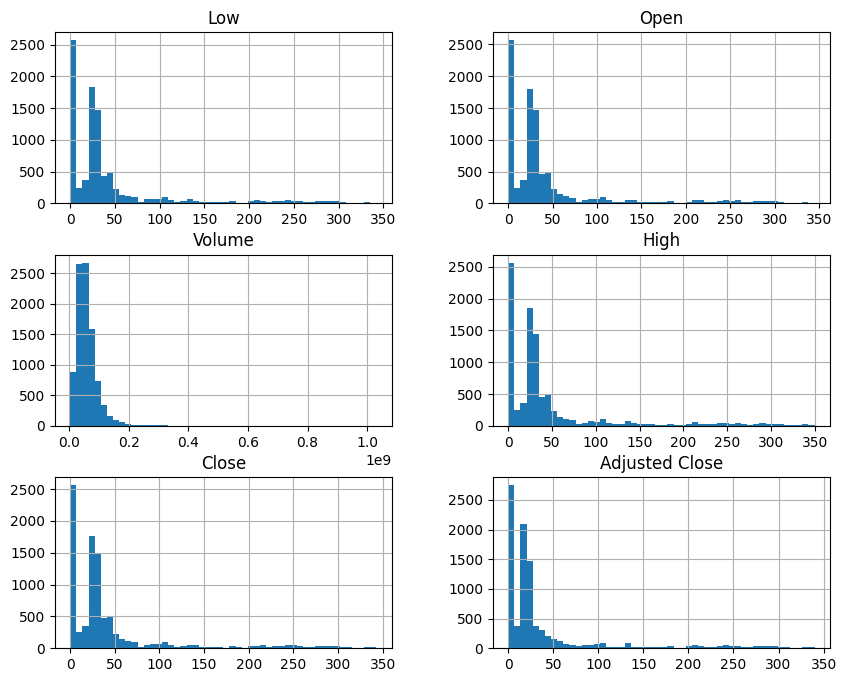

In [4]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(10,8))
plt.show()

## Predict Close based on Low and Volume

### Split data set into input and output for learning

In [12]:


df = read_stock_csv("MSFT")
print(df.tail())

# Input data set X
X = df.drop(columns=['Close', 'Date', 'Open', 'High', 'Adjusted Close'])
col1 = X['Low'].astype(int)
col2 = X['Volume'].astype(int)
list = {'Low':col1, 'Vol':col2}
X = pd.DataFrame(list)
print(X.tail())

# Output data set y
y = df['Close'].astype(int)





Stock Symbol, file: MSFT.csv
Stock found in folder datasets/Kaggle - Stock Market Datasets/Stock Market Data (NASDAQ, NYSE, S&P500)/stock_market_data/forbes2000/csv/MSFT.csv
            Date         Low        Open    Volume        High       Close  \
9259  06-12-2022  243.779999  250.820007  22463700  251.860001  245.119995   
9260  07-12-2022  242.210007  244.830002  20481500  246.160004  244.369995   
9261  08-12-2022  243.059998  244.839996  22611800  248.740005  247.399994   
9262  09-12-2022  244.160004  244.699997  20607100  248.309998  245.419998   
9263  12-12-2022  247.179993  247.445007  10000660  252.151596  250.559998   

      Adjusted Close  
9259      245.119995  
9260      244.369995  
9261      247.399994  
9262      245.419998  
9263      250.559998  
      Low       Vol
9259  243  22463700
9260  242  20481500
9261  243  22611800
9262  244  20607100
9263  247  10000660


### Predict stock close amount based on low and volume using Decision Tree Classifier

In [13]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X, y)
predictions = model.predict([[237,10000660]])
print(predictions)

[240]


C:\Users\ramon\anaconda3\envs\jupyterlab\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Accuracy of model above
### Split data into two sets

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = accuracy_score(y_test, predictions)
score



0.6368051807879115

### Train a model

In [39]:
import joblib

joblib.dump(model, 'stock-close-predictor.joblib')

predictions = model.predict([[237,10000660]])
predictions

C:\Users\ramon\anaconda3\envs\jupyterlab\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([236])

### Visualize the decision tree (STOPPED HERE)

In [ ]:
from sklearn import tree
tree.export_graphviz(model, out_file = 'stock-close-predictor.dot',
                     feature_name = ['', ''], 
                     class_names=sorted(y.unique()), 
                     label='all', 
                     rounded=True,)

In [22]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [135]:
train_set, test_set = split_train_test(df, 0.2)
print(len(train_set))
print(len(test_set))

7412
1852


## Explore S&P 500 Companies with Financial Information - Financials.csv

The Financials CSV contains the link to a stock symbol and company name.

In [ ]:

folder_path_us_stocks_fundamentals = 'datasets/Kaggle - Stock Market Datasets/S&P 500 Companies with Financial Information/'
file_name_financials = 'financials.csv'

df = pd.read_csv(folder_path_us_stocks_fundamentals + file_name_financials)

"""
print(df_financials.values[0]) #number of columns
print(df_financials.values[0][0]) 
print(df_financials.size) 
print(df_financials.head) 
print(len(df_financials))
"""

def find_stock_name(stock_symbol):
    for_ctr = 0
    for row in range(len(df)):
        # Action with these files
        if df.values[for_ctr][0] == stock_symbol:
            # print("Stock Symbol found.")
            print(df.values[row])
            return
        for_ctr += 1
    print("Stock symbol not found.")


In [ ]:
find_stock_name("MSFT")

['MSFT' 'Microsoft Corp.' 'Information Technology' 85.01 25.76 1.8747908
 2.97 96.07 63.22 689978437468.0 41079000000.0 7.1130967 9.49
 'http://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=MSFT']


## Explore US Stocks Fundamentals (XBRL) - companies.csv

The companies.csv contains the link to a company_id based on a company name. company_id then will map to indicators_by_company.csv, which contains the financial indicators.

In [ ]:
folder_path = 'datasets/Kaggle - Stock Market Datasets/US Stocks Fundamentals (XBRL)/'
file_name_companies = 'companies.csv'

df_companies = pd.read_csv(folder_path + file_name_companies)

def find_co_id(co_name):
    for_ctr = 0
    for row in range(len(df_companies)):
        if str(df_companies.values[for_ctr][1]) == str(co_name):
            # print("Stock Symbol found.")
            print(df_companies.values[row])
            return
        if str(df_companies.values[for_ctr][2]) == str(co_name):
            # print("Stock Symbol found.")
            print(df_companies.values[row])
            return
        for_ctr += 1
    print("Stock symbol not found.")


In [ ]:
find_co_id("Sandisk Corp")

[1000180 'Sandisk Corp' nan]


## Explore US Stocks Fundamentals (XBRL) - indicator_by_companies.csv

The companies.csv contains the link to a company_id based on a company name. company_id then will map to indicators_by_company.csv, which contains the financial indicators.

In [20]:
folder_path = 'datasets/Kaggle - Stock Market Datasets/US Stocks Fundamentals (XBRL)/'
file_name = 'indicators_by_company.csv'
df_indicators = pd.read_csv(folder_path + file_name)
#df_indicators.sort_values(by=['company_id'], inplace=True, ascending=True)
# print(df_indicators.values[0][1]) # return row, then column
#print(df_indicators[df_indicators['indicator_id']=='AccountsPayableAndAccruedLiabilitiesCurrentAndNoncurrent'])
# print(df_indicators[df_indicators['company_id']==1000045]) # this is the one you need

# YOU DON'T HAVE TO FOR LOOP SCAN GIVEN ABOVE. DUH!!!

def find_indicators(co_id):
    # print(df_indicators[df_indicators['company_id']==co_id])
    df = df_indicators[df_indicators['company_id']==co_id]
    return df

In [ ]:
#from IPython.display import display

#dh = display('',display_id=True) # for output showing in one line

folder_path = 'datasets/Kaggle - Stock Market Datasets/US Stocks Fundamentals (XBRL)/'
file_name = 'indicators_by_company.csv'
df_indicators = pd.read_csv(folder_path + file_name)
#df_indicators.sort_values(by=['company_id'], inplace=True, ascending=True)
# print(df_indicators.values[0][1]) # return row, then column
print(df_indicators[df_indicators['company_id']==1000045])
#print(df_indicators[df_indicators['indicator_id']=='AccountsPayableAndAccruedLiabilitiesCurrentAndNoncurrent'])



def find_indicators_old_and_dumb(co_id):
    found_ctr = 0
    found_flag = "false"
    loop_how_many = len(df_indicators)
    df_indicators_result = pd.DataFrame(columns=['company_id','indicator_id','2010','2011','2012','2013','2014','2015','2016'])
    # df_indicators_result.set_index('company_id')
    
    for row in range(loop_how_many):
        if str(df_indicators.iloc[row]['company_id']) == str(co_id):
            found_flag = "true"
            # print(df_indicators.iloc[row]['company_id'])
            df_indicators_result.loc[found_ctr] = df_indicators.iloc[row]  
        # If it has already found the co_id, don't continue searching because it takes a long time.
        elif found_flag == "true" and (df_indicators.iloc[row]['company_id'] == df_indicators.iloc[row-1]['company_id']):
            print("All done")
            return df_indicators_result
        # elif below is only for output viewing purposes
        elif found_flag == "false" and (df_indicators.iloc[row]['company_id'] != df_indicators.iloc[row-1]['company_id']):
            # print(str(df_indicators.iloc[row]['company_id']) + " At row: " + str(row))
            log_str = str(df_indicators.iloc[row]['company_id']) + " At row: " + str(row)
            display(log_str, display_id=True)
            dh.update(log_str)
        found_ctr += 1
    if found_flag == "false":
        print("Stock symbol not found.")
    return df_indicators_result


     company_id                                       indicator_id  2010  \
0       1000045  AccountsPayableAndAccruedLiabilitiesCurrentAnd...   NaN   
1       1000045  AccumulatedDepreciationDepletionAndAmortizatio...   NaN   
2       1000045                          AdjustmentForAmortization   NaN   
3       1000045                                             Assets   NaN   
4       1000045                   AssetsHeldForSaleAtCarryingValue   NaN   
..          ...                                                ...   ...   
119     1000045                                 TreasuryStockValue   NaN   
120     1000045                       UndistributedEarningsDiluted   NaN   
121     1000045  UndistributedEarningsLossAllocatedToParticipat...   NaN   
122     1000045    WeightedAverageNumberOfDilutedSharesOutstanding   NaN   
123     1000045      WeightedAverageNumberOfSharesOutstandingBasic   NaN   

            2011         2012         2013         2014         2015  2016  
0      661

In [21]:
df = find_indicators(1000045)
#df = find_indicatorsx(1666114)
#df = find_indicators("9984")

print("hEre")
print(df)

#find_indicators("1000180")

hEre
     company_id                                       indicator_id  2010  \
0       1000045  AccountsPayableAndAccruedLiabilitiesCurrentAnd...   NaN   
1       1000045  AccumulatedDepreciationDepletionAndAmortizatio...   NaN   
2       1000045                          AdjustmentForAmortization   NaN   
3       1000045                                             Assets   NaN   
4       1000045                   AssetsHeldForSaleAtCarryingValue   NaN   
..          ...                                                ...   ...   
119     1000045                                 TreasuryStockValue   NaN   
120     1000045                       UndistributedEarningsDiluted   NaN   
121     1000045  UndistributedEarningsLossAllocatedToParticipat...   NaN   
122     1000045    WeightedAverageNumberOfDilutedSharesOutstanding   NaN   
123     1000045      WeightedAverageNumberOfSharesOutstandingBasic   NaN   

            2011         2012         2013         2014         2015  2016  
0    

In [22]:
df.info()
df.values[0,]
df.shape
df


<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 0 to 123
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_id    124 non-null    int64  
 1   indicator_id  124 non-null    object 
 2   2010          0 non-null      float64
 3   2011          62 non-null     float64
 4   2012          94 non-null     float64
 5   2013          95 non-null     float64
 6   2014          92 non-null     float64
 7   2015          98 non-null     float64
 8   2016          0 non-null      float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.7+ KB


,company_id,indicator_id,2010,2011,2012,2013,2014,2015,2016
0,1000045,AccountsPayableAndAccruedLiabilitiesCurrentAnd...,NaN,6612429.0,7405579.0,8924919.0,7841070.0,5839000.0,NaN
1,1000045,AccumulatedDepreciationDepletionAndAmortizatio...,NaN,NaN,2111343.0,2242703.0,2236449.0,2462000.0,NaN
2,1000045,AdjustmentForAmortization,NaN,NaN,-11482251.0,-13490892.0,-13852305.0,-13811000.0,NaN
3,1000045,Assets,NaN,257236034.0,263835468.0,283429579.0,302528591.0,325309000.0,NaN
4,1000045,AssetsHeldForSaleAtCarryingValue,NaN,1373001.0,1203664.0,1696330.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
119,1000045,TreasuryStockValue,NaN,NaN,NaN,NaN,70408854.0,70459000.0,NaN
120,1000045,UndistributedEarningsDiluted,NaN,NaN,NaN,NaN,NaN,2000.0,NaN
121,1000045,UndistributedEarningsLossAllocatedToParticipat...,NaN,NaN,NaN,NaN,NaN,12211000.0,NaN
122,1000045,WeightedAverageNumberOfDilutedSharesOutstanding,NaN,NaN,12218416.0,12325000.0,12191756.0,7692000.0,NaN


# Explore S&P 500 with Financial Information - financials.csv

The Financials CSV contains the link to a stock symbol and company name among others. Possibly useful for a company's economic sector.
The dataset was last updated in July 2020.

https://www.kaggle.com/datasets/paytonfisher/sp-500-companies-with-financial-information

In [30]:
folder_path = 'datasets/Kaggle - Stock Market Datasets/S&P 500 Companies with Financial Information/'
file_name = 'financials.csv'
df_financials = pd.read_csv(folder_path + file_name)

def find_financials(stock_symbol):
    # print(df_indicators[df_indicators['company_id']==co_id])
    df = df_financials[df_financials['Symbol']==stock_symbol]
    return df


In [32]:
df = find_financials("AAPL")
df

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
51,AAPL,Apple Inc.,Information Technology,155.15,16.86,1.579541,9.2,180.1,131.12,8.095080e+11,7.938600e+10,3.458609,5.66,http://www.sec.gov/cgi-bin/browse-edgar?action...


# Explore Daily Financial News for 6000+ Stocks - analyst_ratings_processed.csv

Contains financial news headline for a given stock

In [26]:
folder_path = 'datasets/Kaggle - Stock Market Datasets/Daily Financial News for 6000+ Stocks/'
file_name = 'analyst_ratings_processed.csv'
df_analyst_ratings_processed = pd.read_csv(folder_path + file_name)

def find_analyst_ratings_processed(stock_symbol):
    df = df_analyst_ratings_processed[df_analyst_ratings_processed['stock']==stock_symbol]
    return df

In [27]:
df = find_analyst_ratings_processed("AAPL")
df

,row_num,title,date,stock
3668,7120.0,Tech Stocks And FAANGS Strong Again To Start D...,2020-06-10 11:33:00-04:00,AAPL
3669,7121.0,10 Biggest Price Target Changes For Wednesday,2020-06-10 08:14:00-04:00,AAPL
3670,7122.0,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",2020-06-10 07:53:00-04:00,AAPL
3671,7123.0,"Deutsche Bank Maintains Buy on Apple, Raises P...",2020-06-10 07:19:00-04:00,AAPL
3672,7124.0,Apple To Let Users Trade In Their Mac Computer...,2020-06-10 06:27:00-04:00,AAPL
...,...,...,...,...
4132,7585.0,"UBS Maintains Buy on Apple, Lowers Price Targe...",2020-03-10 07:06:00-04:00,AAPL
4133,7586.0,123 Biggest Movers From Yesterday,2020-03-10 05:57:00-04:00,AAPL
4134,7587.0,Crude Awakening: Energy Sector Takes A 20% Spi...,2020-03-09 17:09:00-04:00,AAPL
4135,7588.0,Investor Movement Index Summary: February 2020,2020-03-09 13:57:00-04:00,AAPL


# Explore Daily Financial News for 6000+ Stocks - raw_partner_headlines.csv

Contains financial news headline for a given stock also but from third party partners

In [28]:
folder_path = 'datasets/Kaggle - Stock Market Datasets/Daily Financial News for 6000+ Stocks/'
file_name = 'raw_partner_headlines.csv'
df_partner_headlines = pd.read_csv(folder_path + file_name)

def find_partner_headlines(stock_symbol):
    df = df_partner_headlines[df_partner_headlines['stock']==stock_symbol]
    return df

In [33]:
df = find_analyst_ratings_processed("AAPL")
df

,row_num,title,date,stock
3668,7120.0,Tech Stocks And FAANGS Strong Again To Start D...,2020-06-10 11:33:00-04:00,AAPL
3669,7121.0,10 Biggest Price Target Changes For Wednesday,2020-06-10 08:14:00-04:00,AAPL
3670,7122.0,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",2020-06-10 07:53:00-04:00,AAPL
3671,7123.0,"Deutsche Bank Maintains Buy on Apple, Raises P...",2020-06-10 07:19:00-04:00,AAPL
3672,7124.0,Apple To Let Users Trade In Their Mac Computer...,2020-06-10 06:27:00-04:00,AAPL
...,...,...,...,...
4132,7585.0,"UBS Maintains Buy on Apple, Lowers Price Targe...",2020-03-10 07:06:00-04:00,AAPL
4133,7586.0,123 Biggest Movers From Yesterday,2020-03-10 05:57:00-04:00,AAPL
4134,7587.0,Crude Awakening: Energy Sector Takes A 20% Spi...,2020-03-09 17:09:00-04:00,AAPL
4135,7588.0,Investor Movement Index Summary: February 2020,2020-03-09 13:57:00-04:00,AAPL


# Explore Daily Financial News for 6000+ Stocks - raw_analyst_ratings.csv

Contains financial news headline for a given stock also but from third party sites

In [33]:
folder_path = 'datasets/Kaggle - Stock Market Datasets/Daily Financial News for 6000+ Stocks/'
file_name = 'raw_partner_headlines.csv'
df_analyst_ratings = pd.read_csv(folder_path + file_name)

def find_analyst_ratings(stock_symbol):
    df = df_analyst_ratings[df_analyst_ratings['stock']==stock_symbol]
    return df

In [34]:
df = find_analyst_ratings("AAPL")
df

,row_num,headline,url,publisher,date,stock
4067,4130,American Pie,https://talkmarkets.com/content/american-pie?p...,TalkMarkets,2020-06-02 00:00:00,AAPL
4068,4131,Tech Giants Dare Antitrust Deal Watchdogs,https://talkmarkets.com/content/tech-giants-da...,TalkMarkets,2020-06-02 00:00:00,AAPL
4069,4132,MoneyGram Shares Jump 50% As Western Union Rep...,https://talkmarkets.com/content/moneygram-shar...,TalkMarkets,2020-06-02 00:00:00,AAPL
4070,4133,All Eyes on Market Volatility,https://talkmarkets.com/content/all-eyes-on-ma...,TalkMarkets,2020-06-01 00:00:00,AAPL
4071,4134,Warren Buffett's Berkshire Hathaway Turns Up S...,http://www.gurufocus.com/news/1152965/warren-b...,GuruFocus,2020-06-01 00:00:00,AAPL
4072,4135,COVID 2.0?,https://talkmarkets.com/content/covid-20?post=...,TalkMarkets,2020-06-01 00:00:00,AAPL
4073,4136,Apple CEO Writes To Employees About George Flo...,https://talkmarkets.com/content/apple-ceo-writ...,TalkMarkets,2020-05-31 00:00:00,AAPL
4074,4137,First the Deflationary Deluge of Assets Crashi...,https://talkmarkets.com/content/first-the-defl...,TalkMarkets,2020-05-31 00:00:00,AAPL
4075,4138,"Market Briefing For Monday, June 1",https://talkmarkets.com/content/market-briefin...,TalkMarkets,2020-05-31 00:00:00,AAPL
4076,4139,Five Monster Stock Market Predictions For The ...,https://talkmarkets.com/content/five-monster-s...,TalkMarkets,2020-05-31 00:00:00,AAPL
